In [1]:
import sys
import time
import datetime as dt
from datetime import datetime
import urllib
# Number manipulation
import numpy as np


# Structure manipulation
import pandas as pd
from pandas import Series, DataFrame
from pandas.tools.plotting import scatter_matrix


# Graphing 
import seaborn as sb

import matplotlib.pyplot as plt
from matplotlib import rcParams


# Stats
import scipy as sp
from scipy import stats
from scipy.stats.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import chi2_contingency


# Machine Learning & Preprocessing Package
import sklearn
import sklearn.metrics as sm
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import LassoLarsCV
from sklearn.linear_model import LassoLarsIC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import preprocessing
from sklearn import decomposition
from sklearn import metrics
from sklearn.cluster import DBSCAN
from sklearn.decomposition import FactorAnalysis
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import scale
from sklearn.preprocessing import LabelEncoder
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cross_validation import train_test_split

import statsmodels.api as sm
import statsmodels.formula.api as smf

from collections import Counter

import networkx as nx



# Parameters for graphs
%matplotlib inline
rcParams['figure.figsize'] = 10,10
sb.set_style('whitegrid')


# Mac
#x = pd.read_csv('/Users/magicsoccer10/Dropbox/twerk werk/Property Value/07-17.csv')

# Arch
#x = pd.read_csv('C:/Users/scott/Dropbox/twerk werk/Data/cre_values')

# Work
x = pd.read_csv('C:/Users/sstandring/Dropbox/twerk werk/Data/SFprops_cap.csv')

x = x.dropna(axis = 0)
x.head()

C:\Users\sstandring\AppData\Local\Continuum\Anaconda3\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)
C:\Users\sstandring\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


,Property: Property Name,Prop City,Prop County,Last Sale,Last Price,Est. Sale Cap,Units,# 1 Bedrooms,# 2 Bedrooms,# 3 Bedrooms,Square Footage,Year Built,Prop Zip Code
0,1740 35th Ave,Oakland,Alameda,2/11/2013,305000,14.86,5,1,1,0,2857,1940.0,94601.0
1,8500 International Blvd,Oakland,Alameda,8/29/2014,797000,14.79,13,5,5,0,6904,1933.0,94621.0
2,510 N 2nd St,San Jose,Santa Clara,4/9/2015,770000,14.72,9,9,0,0,2685,1907.0,95112.0
4,1134-1142 International Blvd,Oakland,Alameda,10/14/2013,420000,14.68,6,2,4,0,3820,1906.0,94606.0
5,833-881 Jamestown Ave,San Francisco,San Francisco,11/30/2012,29000000,14.65,121,35,35,35,104000,2013.0,94124.0


In [2]:
df = pd.DataFrame()
df['date'] = x['Last Sale'].astype('str')
df['price'] = x['Last Price']
df['year'] = x['Year Built'].astype('str').str[:-3]
df['cap'] = x['Est. Sale Cap']
df['units'] = x['Units']
df['bed1'] = x['# 1 Bedrooms']
df['bed2'] = x['# 2 Bedrooms']
df['bed3'] = x['# 3 Bedrooms']
df['sqft'] = x['Square Footage']
df['county'] = x['Prop County']
df['city'] = x['Prop City']
df['zipper'] = x['Prop Zip Code']
df['year'] = df['year'].astype(int)
df.zipper = df.zipper.astype('str').str[:-3]
df.describe()

,price,year,cap,units,bed1,bed2,bed3,sqft
count,1.669000e+03,1669.000000,1669.000000,1669.000000,1669.000000,1669.000000,1669.000000,1669.000000
mean,8.870815e+07,195.525464,6.037867,31.473936,14.100060,12.710605,1.787897,27690.022768
std,7.612387e+08,13.675105,2.890181,77.015361,34.740096,39.768027,10.909232,71818.364224
min,2.700000e+05,187.000000,0.030000,2.000000,0.000000,0.000000,0.000000,1336.000000
25%,1.085000e+06,194.000000,3.980000,6.000000,1.000000,0.000000,0.000000,4816.000000
50%,1.950000e+06,196.000000,5.530000,9.000000,5.000000,3.000000,0.000000,7404.000000
75%,4.400000e+06,196.000000,7.690000,20.000000,10.000000,7.000000,0.000000,16117.000000
max,8.737160e+09,645.000000,14.860000,948.000000,509.000000,706.000000,268.000000,950000.000000


C:\Users\sstandring\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


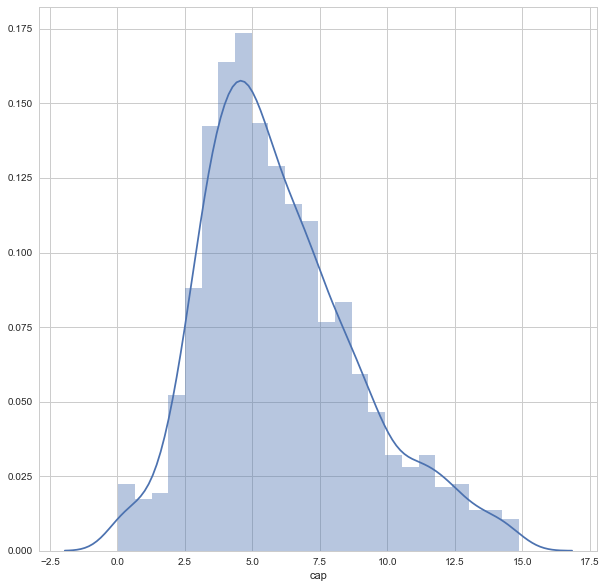

In [3]:
v = df.cap
sb.distplot(v)

C:\Users\sstandring\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


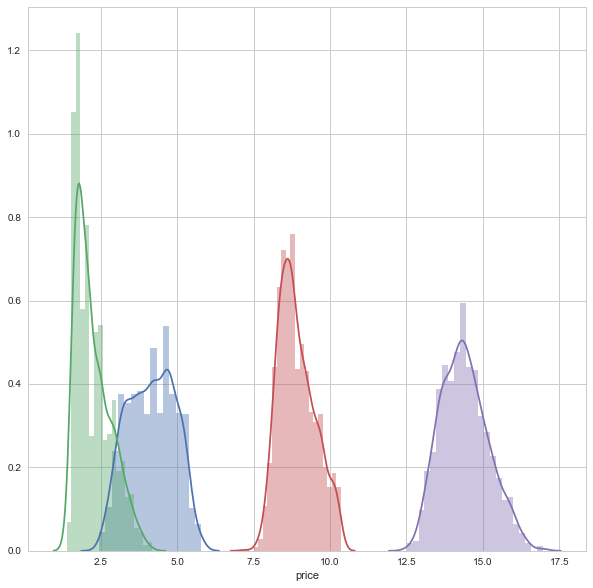

In [4]:
df['sqft_unit'] = np.log(df.sqft)/np.log(df.units)
df['log_price'] = np.log(df.price)
df = df.loc[df['year'] < 300]
df = df.loc[df['price'] < df.price.quantile(.95)]
df = df.loc[df['units'] < df.units.quantile(.95)]
df = df.loc[df['sqft'] < df.sqft.quantile(.95)]
df = df.loc[df['sqft_unit'] < df.sqft_unit.quantile(.95)]

xy = df.sqft_unit        
x = np.log(df.units)
y = np.log(df.sqft)
z = np.log(df.price)
sb.distplot(xy)
sb.distplot(x)
sb.distplot(y)
sb.distplot(z)


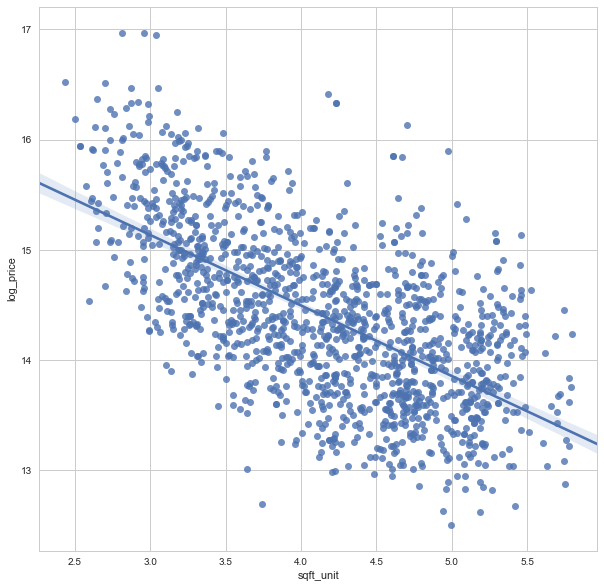

In [5]:
sb.regplot('sqft_unit','log_price',df, scatter=True)

C:\Users\sstandring\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


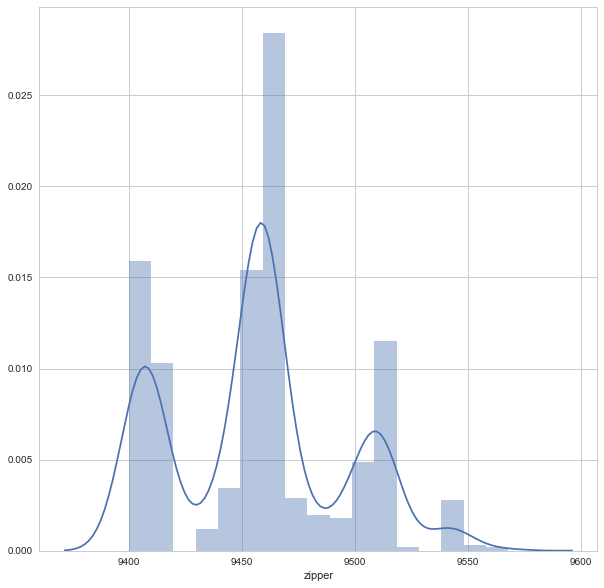

In [6]:
a = df.zipper.astype('int')
sb.distplot(a)

In [7]:
freqs = Counter(df.zipper)
frex = Counter(df.county)
print(frex)
print(freqs)

Counter({'Alameda': 551, 'Santa Clara': 279, 'San Mateo': 215, 'San Francisco': 138, 'Contra Costa': 80, 'Sonoma': 48, 'Solano': 18, 'Marin': 17, 'Napa': 5, 'San Joaquin': 3})
Counter({'9460': 252, '9461': 122, '9511': 88, '9454': 77, '9406': 73, '9512': 58, '9411': 57, '9440': 46, '9410': 40, '9505': 39, '9470': 35, '9450': 32, '9404': 30, '9408': 30, '9412': 26, '9480': 26, '9540': 24, '9401': 24, '9457': 22, '9400': 21, '9452': 18, '9459': 17, '9430': 16, '9413': 15, '9407': 15, '9402': 14, '9455': 11, '9453': 11, '9500': 10, '9502': 9, '9513': 8, '9456': 7, '9490': 7, '9462': 6, '9503': 6, '9451': 6, '9403': 6, '9495': 6, '9547': 5, '9458': 5, '9542': 4, '9549': 4, '9544': 4, '9496': 4, '9494': 4, '9471': 4, '9520': 3, '9492': 2, '9568': 2, '9493': 1, '9562': 1, '9501': 1})


In [8]:
d = df.loc[df['county'] != ('Marin')]
d = d.loc[d['county'] != 'Napa']
gudcounty = d.loc[d['county'] != 'San Joaquin']

In [9]:
df.head()

,date,price,year,cap,units,bed1,bed2,bed3,sqft,county,city,zipper,sqft_unit,log_price
0,2/11/2013,305000,194,14.86,5,1,1,0,2857,Alameda,Oakland,9460,4.944290,12.628067
1,8/29/2014,797000,193,14.79,13,5,5,0,6904,Alameda,Oakland,9462,3.446406,13.588610
2,4/9/2015,770000,190,14.72,9,9,0,0,2685,Santa Clara,San Jose,9511,3.593368,13.554146
4,10/14/2013,420000,190,14.68,6,2,4,0,3820,Alameda,Oakland,9460,4.603300,12.948010
7,4/3/2013,500000,194,14.51,8,8,0,0,10576,Alameda,Oakland,9461,4.456169,13.122363


In [10]:
est = smf.ols(formula = 'np.log(price) ~ (cap + (np.log(sqft)/np.log(units)) + year) * C(zipper)', data = gudcounty)
results = est.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(price)   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     108.3
Date:                Fri, 26 May 2017   Prob (F-statistic):               0.00
Time:                        14:01:33   Log-Likelihood:                 504.01
No. Observations:                1329   AIC:                            -576.0
Df Residuals:                    1113   BIC:                             545.5
Df Model:                         215                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------------

In [16]:
a = pd.DataFrame({'cap':[2.88],'units':[6], 'sqft':[9504],'year':[190], 'zipper':['9410']})
ans = results.predict(a)
price = np.exp(ans).astype(int)
ppsf = price/a.sqft
print('Price: ')
print(price)
print('Price per SQFT: ')
print(ppsf.values)

Price: 
[2605156]
Price per SQFT: 
[ 274.11153199]
